### Determine the optimal K number
* Elbow method
* Average silhouette method: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.decomposition import PCA
%matplotlib inline

In [36]:
import os
os.path.getsize("PHBsample14_sss.csv")
#0.42GB

428182731

In [2]:
# Use a smaller data set to save time
df = pd.read_csv('PHBsample14_sss.csv', low_memory=False)

In [3]:
# drop the column resulted from sampling of the original data set
df.drop('Unnamed: 0', axis=1, inplace=True)
# In order to run K-means, drop all the categoricald data for now.
df = df.select_dtypes(include=['float64', 'int64'])
# Impute missing values with means
df = df.fillna(df.mean())

#### svd_solver : string {'auto', 'full', 'arpack', 'randomized'}
        auto :
            the solver is selected by a default policy based on `X.shape` and
            `n_components`: if the input data is larger than 500x500 and the
            number of components to extract is lower than 80% of the smallest
            dimension of the data, then the more efficient 'randomized'
            method is enabled. Otherwise the exact full SVD is computed and
            optionally truncated afterwards.
        full :
            run exact full SVD calling the standard LAPACK solver via
            `scipy.linalg.svd` and select the components by postprocessing
        arpack :
            run SVD truncated to n_components calling ARPACK solver via
            `scipy.sparse.linalg.svds`. It requires strictly
            0 < n_components < X.shape[1]
        randomized :
            run randomized SVD by the method of Halko et al.
https://stackoverflow.com/questions/43211378/performing-svd-by-sklearn-decomposition-pca-how-can-i-get-the-u-s-v-from-this

#### without PCA
For n_clusters = 7 The average silhouette_score is : 0.0442726713669
#### with PCA, 200 components, svd_solve='auto'
For n_clusters = 7 The average silhouette_score is : -0.0321282902649
#### with PCA, 200 components, svd_solve='randomized'
For n_clusters = 7 The average silhouette_score is : -0.00831270984187
#### with PCA, 200 components, svd_solve='full'
For n_clusters = 7 The average silhouette_score is : -0.0289364441682
#### with PCA, 2 components, svd_solve='randomized'
n_clusters = 7 The average silhouette_score is : 0.626067855469

### with PCA, 200 components, svd_solve='auto'

In [4]:
pca = PCA(200, svd_solver='auto')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 7 The average silhouette_score is : -0.0321282902649


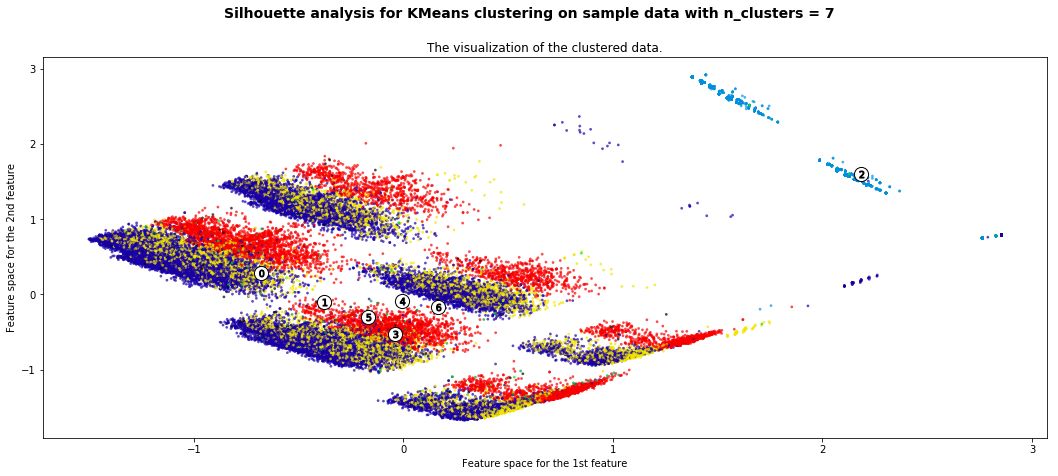

In [57]:
import time
start = time.time()
# Determine your k range

k_range = range(7,8)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### with PCA, 200 components, svd_solve=randomized'

In [60]:
pca = PCA(200, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 7 The average silhouette_score is : -0.00831270984187


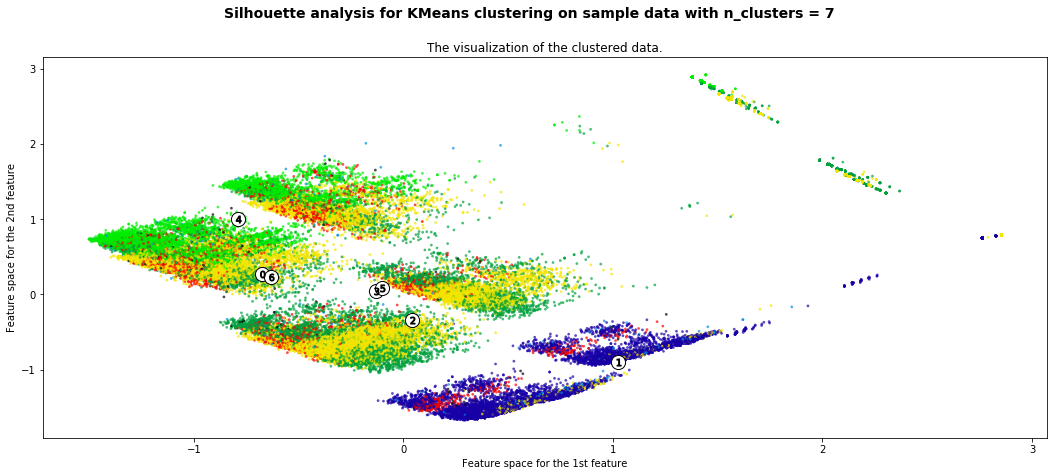

In [61]:
import time
start = time.time()
# Determine your k range

k_range = range(7,8)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### with PCA, 200 components, svd_solve=full

In [62]:
pca = PCA(200, svd_solver='full')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 7 The average silhouette_score is : -0.0289364441682


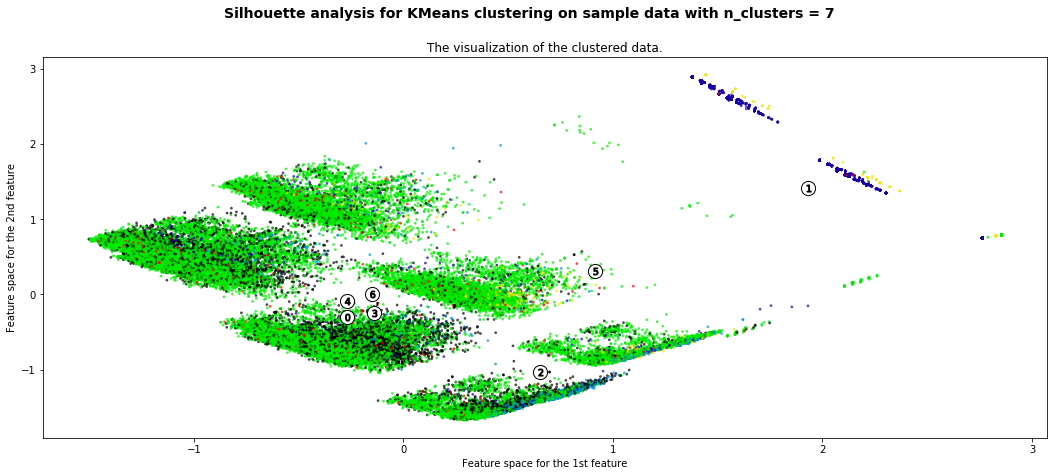

In [63]:
import time
start = time.time()
# Determine your k range

k_range = range(7,8)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### with PCA, 2 components, svd_solve=randomized

In [7]:
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 7 The average silhouette_score is : 0.626067855469


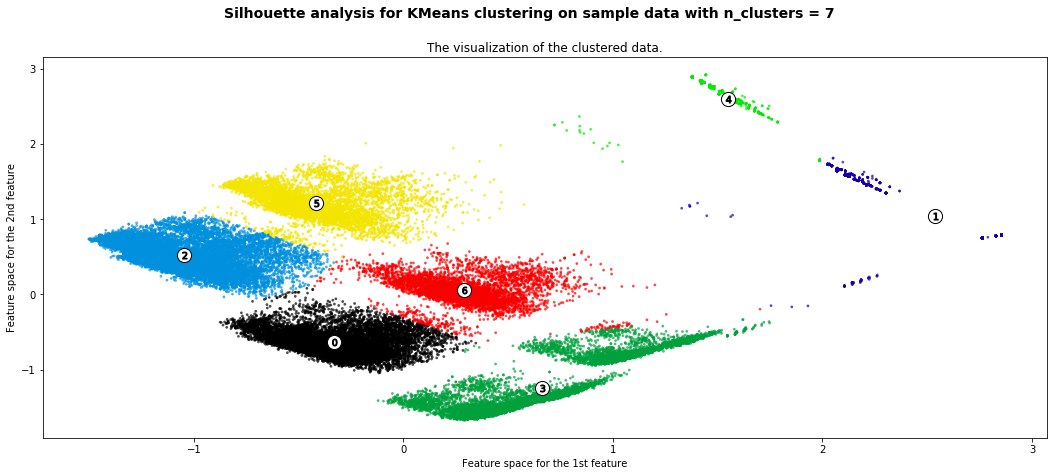

In [65]:
import time
start = time.time()
# Determine your k range

k_range = range(7,8)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### Determine the optimal K

In [ ]:
pca = PCA(2, svd_solver='randomized')
pca.fit(df)
df_reduced = pca.fit_transform(df)
df_reduced = StandardScaler().fit_transform(df_reduced)

For n_clusters = 2 The average silhouette_score is : 0.5929750406387754


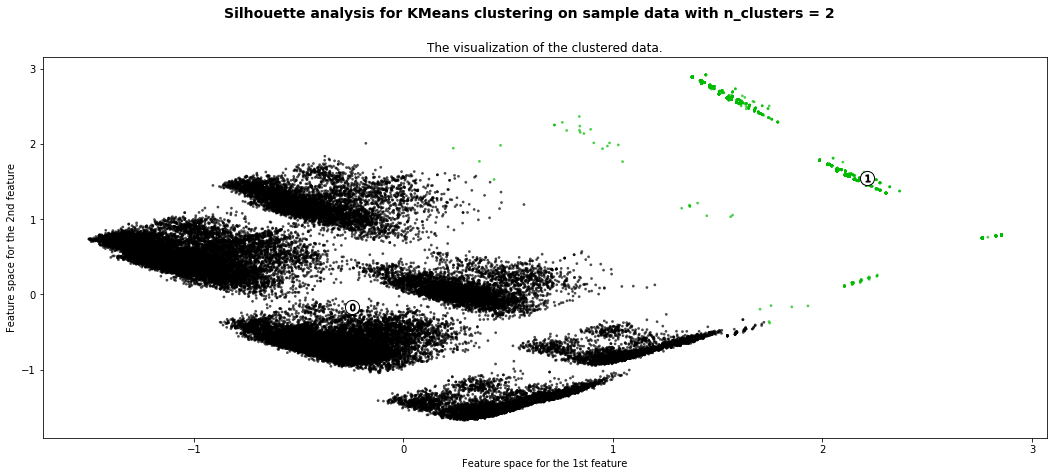

For n_clusters = 3 The average silhouette_score is : 0.5694901869824573


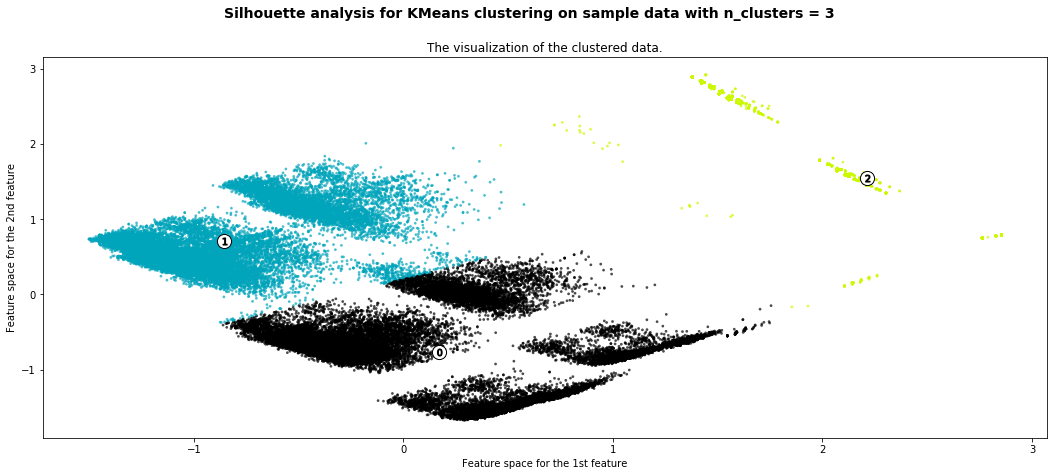

For n_clusters = 4 The average silhouette_score is : 0.5674491092898319


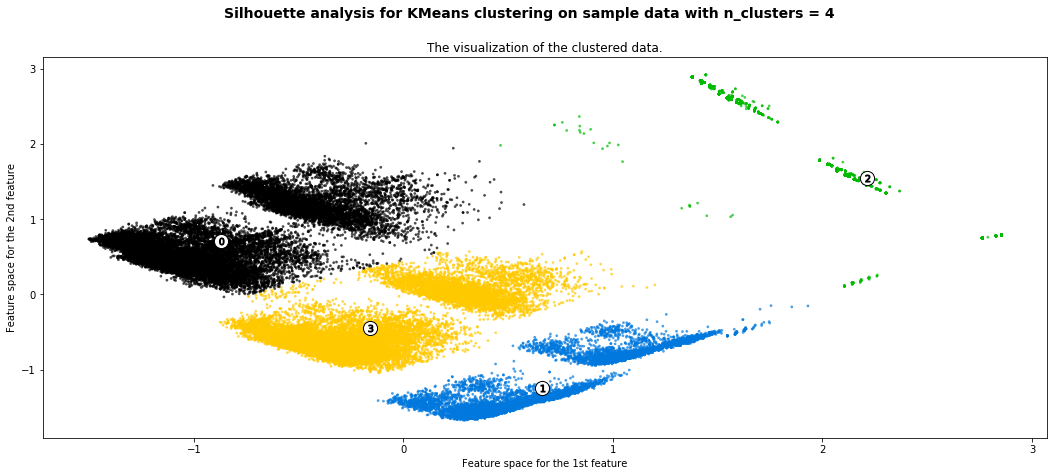

For n_clusters = 5 The average silhouette_score is : 0.5774943491648179


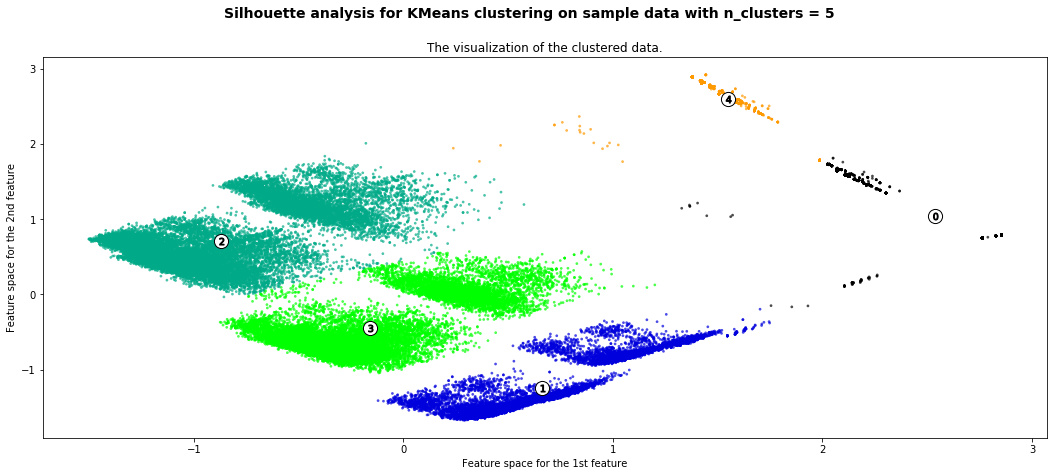

For n_clusters = 6 The average silhouette_score is : 0.5844721808796794


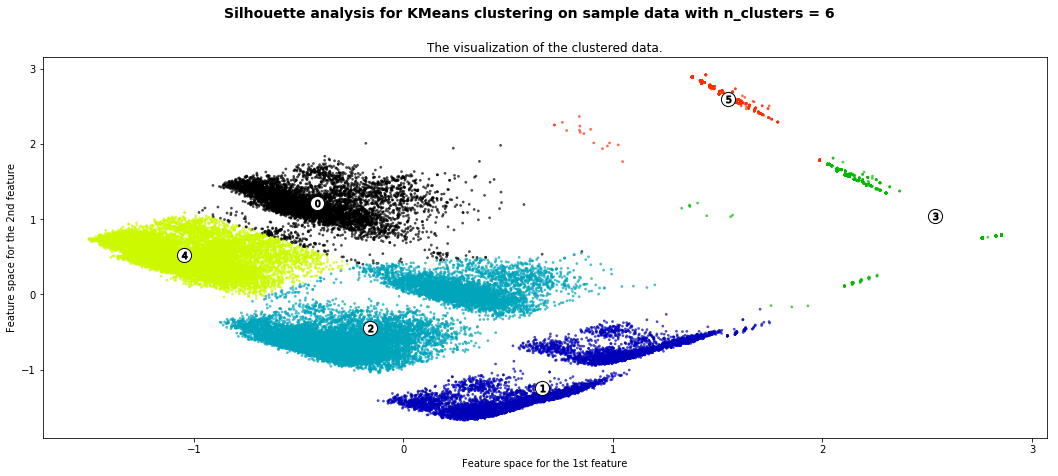

For n_clusters = 7 The average silhouette_score is : 0.6215162677242431


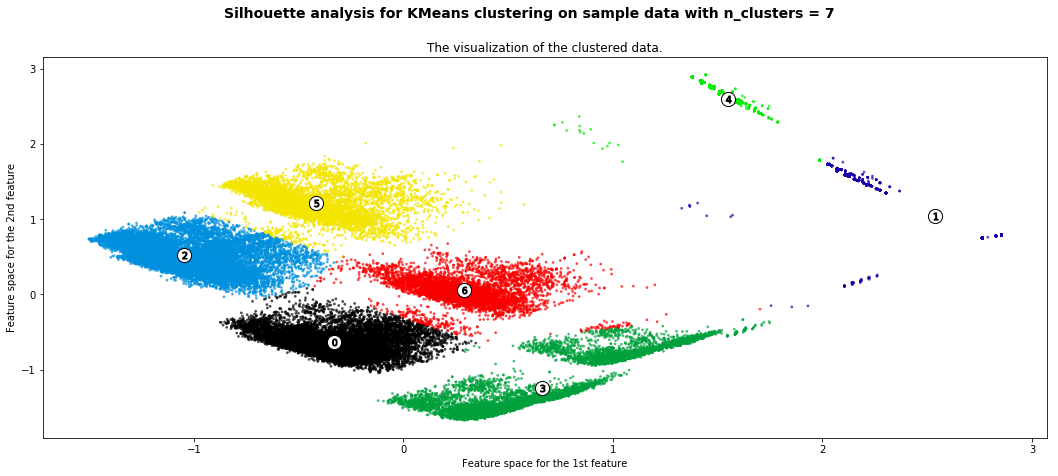

For n_clusters = 8 The average silhouette_score is : 0.6597281362228777


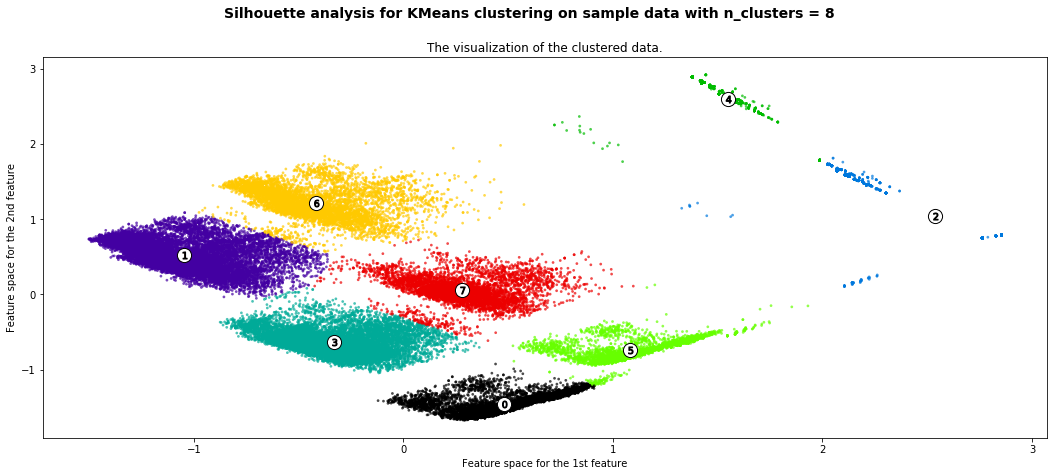

For n_clusters = 9 The average silhouette_score is : 0.6752831172086959


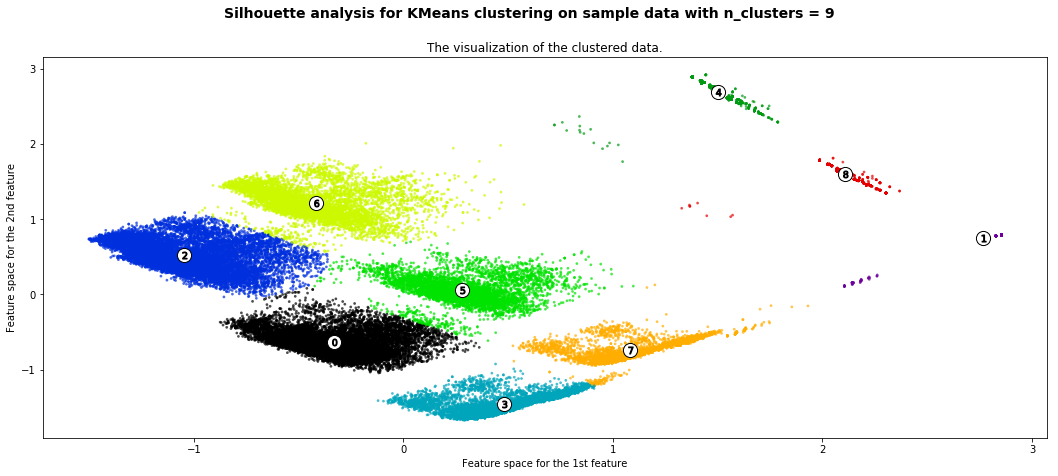

For n_clusters = 10 The average silhouette_score is : 0.6136831904886468


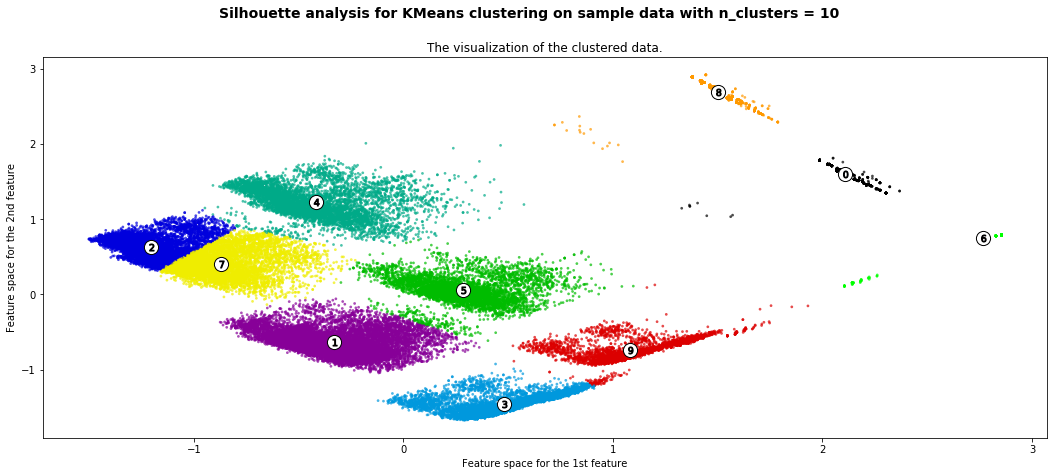

For n_clusters = 11 The average silhouette_score is : 0.5416091706607058


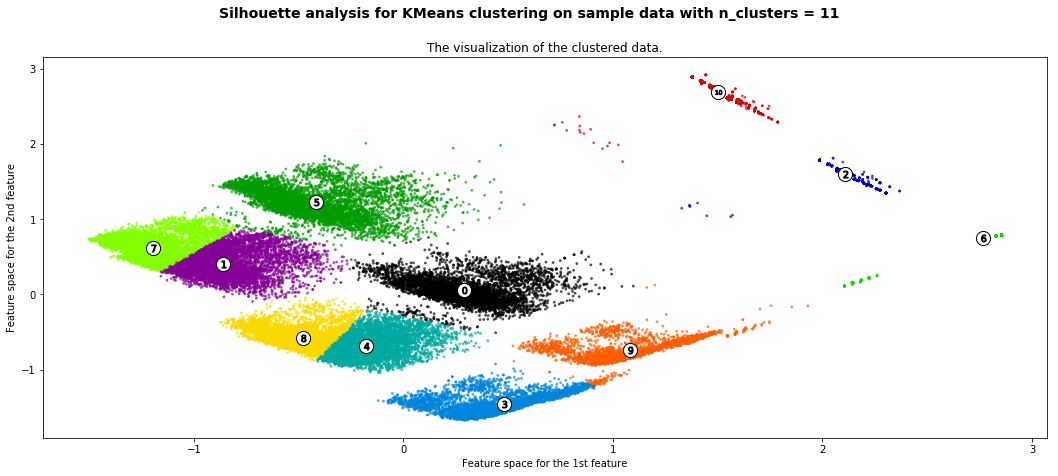

For n_clusters = 12 The average silhouette_score is : 0.5163831383695763


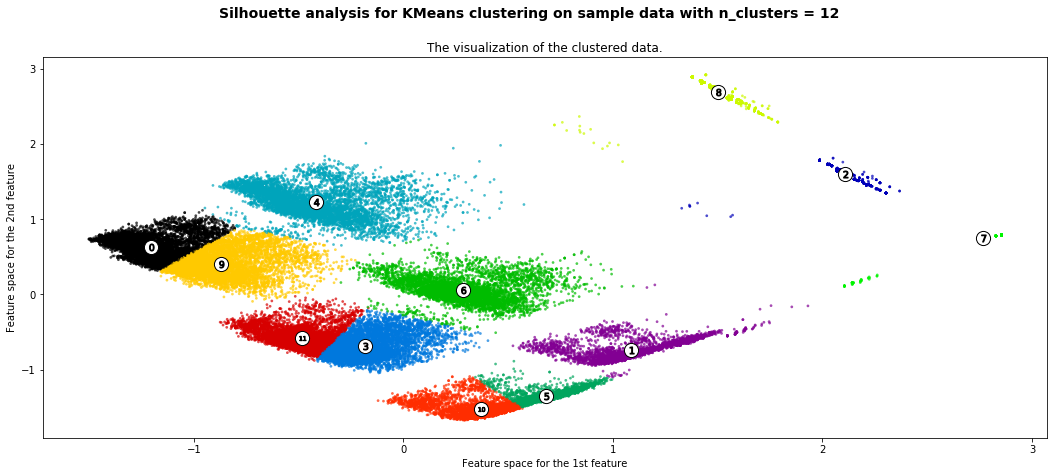

For n_clusters = 13 The average silhouette_score is : 0.49140606102085166


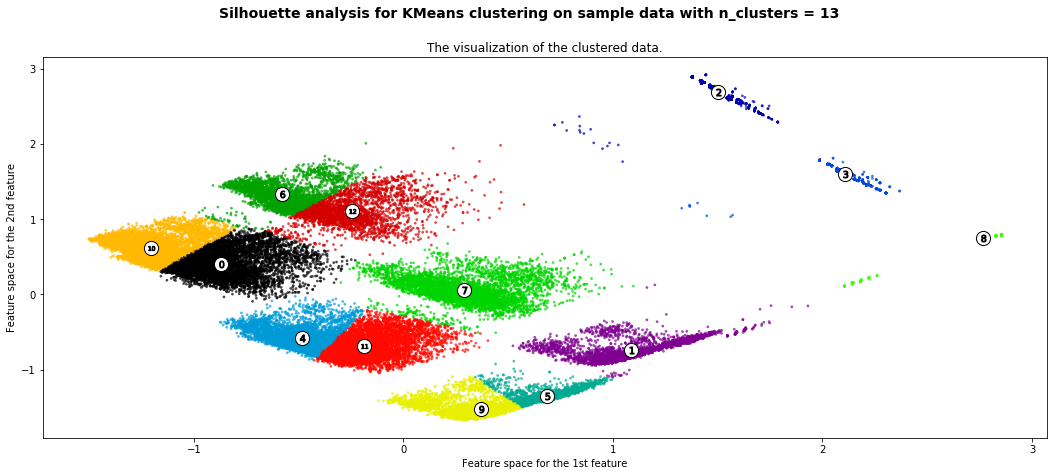

In [8]:
# Determine your k range

score = []
k_range = range(2,14)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
     

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax.set_title("The visualization of the clustered data.")
    ax.set_xlabel("Feature space for the 1st feature")
    ax.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    fig.savefig('OptimalK_silhouette'+ str(n_clusters) + '.png', dpi=100)

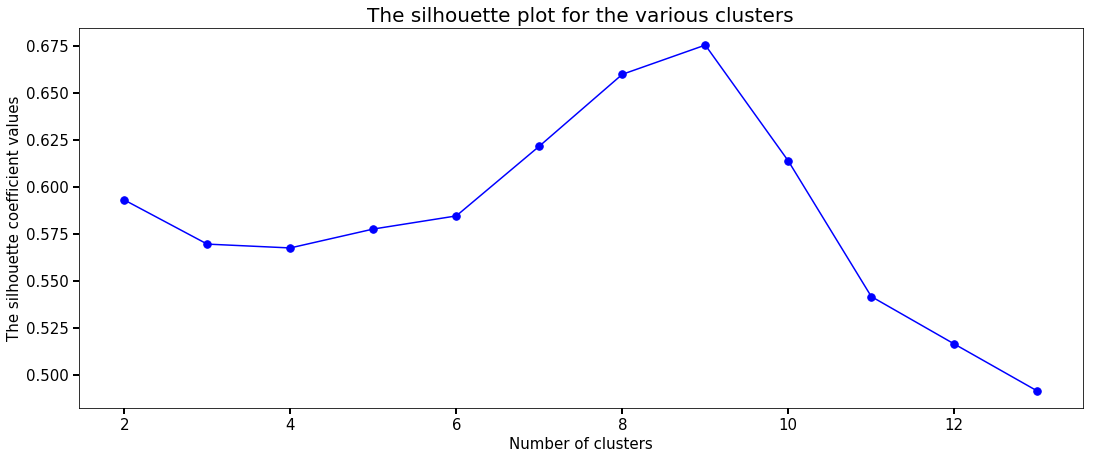

In [27]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(18, 7)
ax.plot(k_range, score, marker='.', markersize=15, color='b')
ax.set_title("The silhouette plot for the various clusters", fontsize=20)
ax.set_xlabel("Number of clusters", fontsize=15)
ax.set_ylabel("The silhouette coefficient values", fontsize=15)
ax.tick_params(direction='out', length=6, width=2, labelsize=15)
fig.savefig('OptimalK_silhouette.png')

### plot silhouette sample score when we have bigger ram size, run the following code

In [ ]:
import time
start = time.time()
# Determine your k range

k_range = range(7,8)

for n_clusters in k_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_reduced)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    # Had to set sample_size, since RAM is not enough for calculating silhouette_score for the entire data set
    silhouette_avg = silhouette_score(df_reduced, cluster_labels, metric='euclidean',sample_size=3000)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    
    ## RAM size not enough for calculating silhouette_sample
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_reduced[:, 0], df_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
end = time.time()

hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))